 # SyriaTel Customer Churn Analysis

<img src="images/syriaTellogo.jpg" width=200 height=200 />


## Overview 

This project analyses aspects of telecommunications to understand what causes people to stop taking the calls/doing business with them. This project primarily uses logistic regression, k nearest neighbor, and random forest to understand this binary classification problem.

## Business Problem

<img src="images/syriaTel.jpg" width=200 height=200 />

SyriaTel, a telecommunications company wants to know whether there are any indicators of whether a customer will stop doing business with them. The goal is to predict what measures are causing customers to 'churn' or leave the Telecom company. This could lead to customer retention if understanding what aspects of the customer interaction are causing them to 'churn'. 

## Data Understanding

In [1]:
#import necessary libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score,precision_score,f1_score,log_loss
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import warnings; warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from tabulate import tabulate
import dataframe_image as dfi
from pandas.plotting import table 

In [2]:
#load data from csv file
df = pd.read_csv('data/SyriaTeldata.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#inspect data to understand what information SyriaTel has collected
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
#inspect columns
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [5]:
#inpsect value counts of columns to see how much data has been collected
df.value_counts

<bound method DataFrame.value_counts of      state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                

##  Data EDA

In [6]:
#investigate value counts of false and true churns because it is our target feature
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [7]:
#investigate the percentage of people who churned and did not churn
n=len(df)
surv_0=len(df[df['churn']==0])
surv_1=len(df[df['churn']==1])

print("% of people who did churn from dataset: ",surv_1*100/n)
print("% of people who did not churn from dataset: ",surv_0*100/n)

% of people who did churn from dataset:  14.491449144914492
% of people who did not churn from dataset:  85.5085508550855


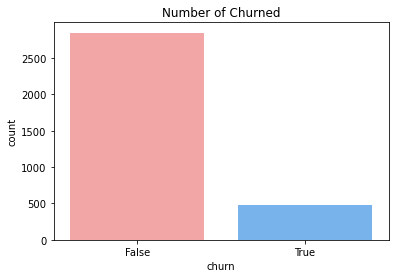

In [8]:
#visulize value counts of churned
fig , ax = plt.subplots(figsize=(6,4))
palette= ['#ff9999','#66b3ff','#99ff99','#ffcc99']
sns.countplot(x='churn', data=df, palette = palette)
plt.title("Number of Churned")
plt.show()


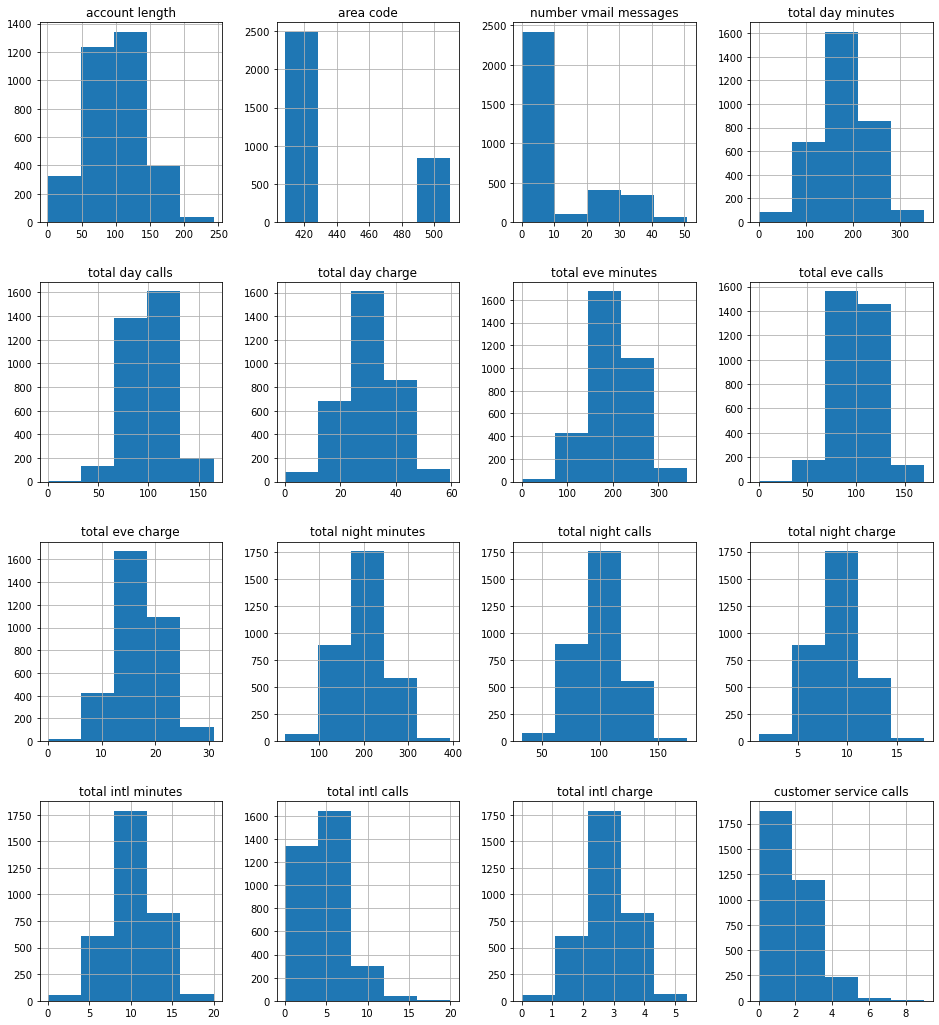

In [9]:
### create histograms to see overall trends over time with each feature
df.hist(bins = 5, figsize = (16,18))
plt.show()

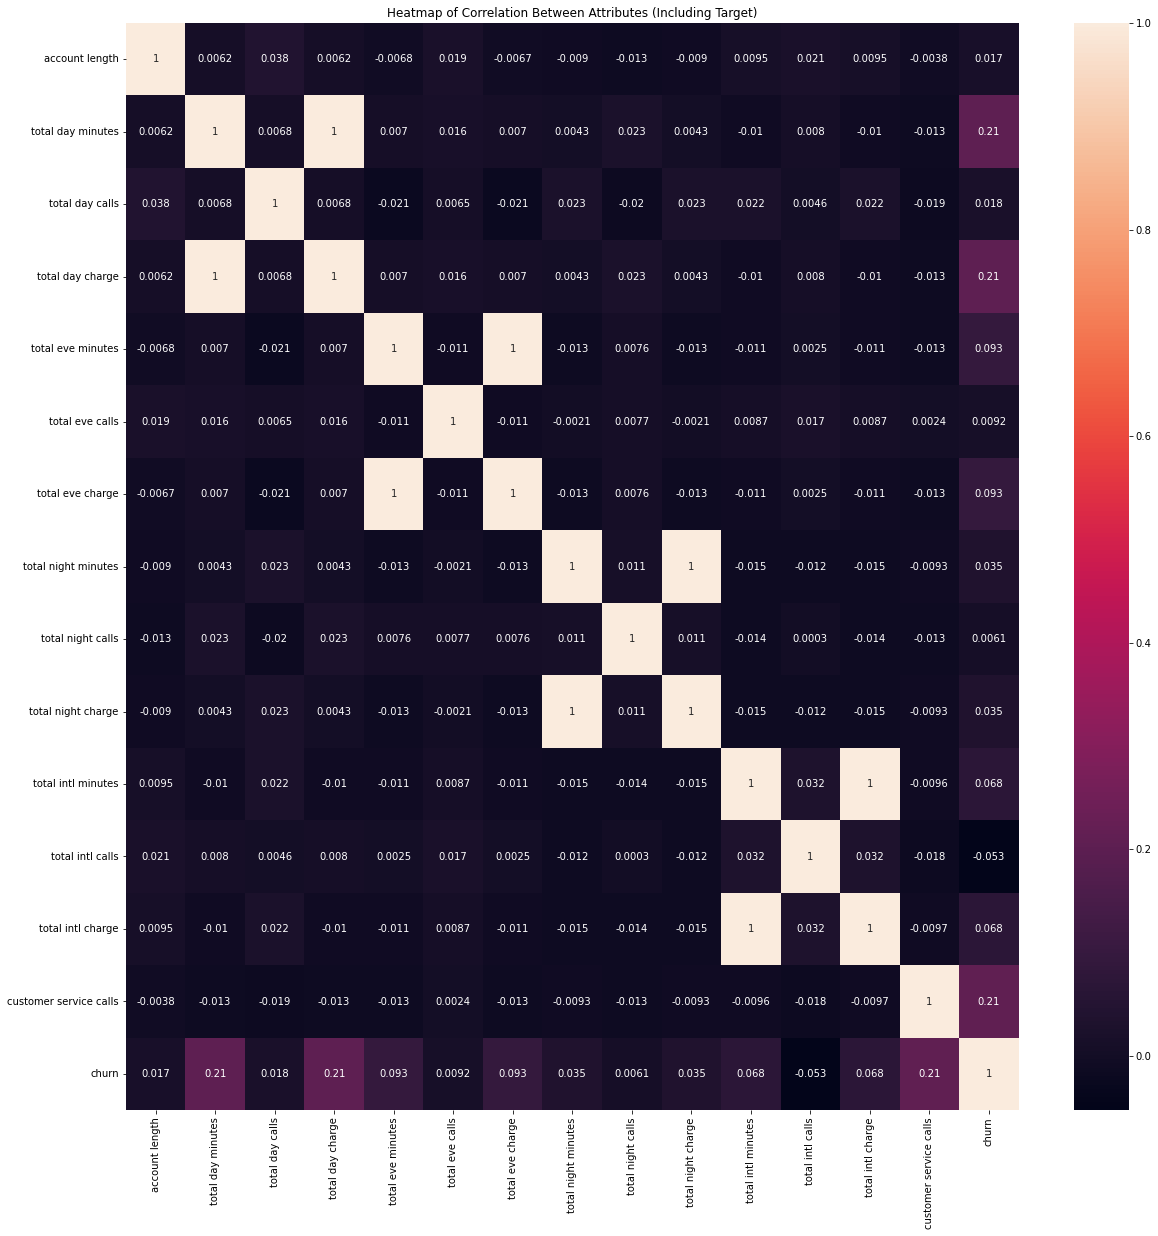

In [10]:
#create a heatmap to inspect correlation between features and the target ('churn')
corr_mat = df[["account length", 'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn']].corr()
fig, ax = plt.subplots(figsize=(20, 20))
# plot it
sns.heatmap(corr_mat, annot = True)
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [11]:
#inspect total day minutes, as one of the most highly correlated features
print(df['total day minutes'].describe())

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: total day minutes, dtype: float64


In [12]:
#inspect total day charge, as one of the most highly correlated features
print(df['total day charge'].describe())

count    3333.000000
mean       30.562307
std         9.259435
min         0.000000
25%        24.430000
50%        30.500000
75%        36.790000
max        59.640000
Name: total day charge, dtype: float64


In [13]:
#inspect customer service calls, as one of the most highly correlated features
print(df['customer service calls'].describe())

count    3333.000000
mean        1.562856
std         1.315491
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: customer service calls, dtype: float64


There are not many highly correlated features with 'churn'. The features that are the most highly corrected are 'total day minutes', 'total day charge', and 'customer service calls'. These features possibly could effect 'churn' and will be further investigated. 

## Data Cleaning

In [14]:
#investigate any null values 
df.isnull().values.any()

False

In [15]:
# drop unnecessary columns- not valuable for business question
df.drop(columns = ['phone number', 'area code', 'state'], axis = 1, inplace = True)

In [16]:
#one hot encoding of international plan from 'yes' and 'no' to binary
df['international plan'].replace(('yes', 'no'), (1,0), inplace=True)

In [17]:
#check that international plan column is now binary
df['international plan']

0       0
1       0
2       0
3       1
4       1
       ..
3328    0
3329    0
3330    0
3331    1
3332    0
Name: international plan, Length: 3333, dtype: int64

In [18]:
#one hot encoding of voice mail plan from 'yes' and 'no' to binary
df['voice mail plan'].replace(('yes', 'no'), (1,0), inplace=True)

In [19]:
#check that voice mail plan is now binary
df['voice mail plan']

0       1
1       1
2       0
3       0
4       0
       ..
3328    1
3329    0
3330    0
3331    0
3332    1
Name: voice mail plan, Length: 3333, dtype: int64

In [20]:
#create variable of column 'churn' from the data for readibility
churn = df['churn']

In [21]:
#inspect the churn variable for length and dtype
churn.head(100)

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98     True
99     True
Name: churn, Length: 100, dtype: bool

## Create training and test sets

In [22]:
#create training sets to start modeling and prediction upon the data
y = churn.astype(int)
X = df.drop(columns=['churn'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [23]:
#Normalize the data to prevent leakage
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)

X_test_ss = ss.transform(X_test)

## Instantiating Models

In [24]:
#instantiating models within a dictionary
models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [25]:
#looking for accuracy, precision and recall scores within the models
accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train_ss, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test_ss)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [26]:
#printing out accuracy, precision, and recall scores from each of those models to see which has the highest baseline with which to hypertune

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
columns=['Accuracy', 'Precision', 'Recall']


modeltable = (tabulate(df_model, headers = columns, tablefmt="grid"))
print(modeltable)

plt.savefig('modeltable.png')
dfi.export(df_model, "modeltable.png")

+-------------------------+------------+-------------+----------+
|                         |   Accuracy |   Precision |   Recall |
+=========================+============+=============+==========+
| Logistic Regression     |   0.858513 |       0.192 | 0.585366 |
+-------------------------+------------+-------------+----------+
| Support Vector Machines |   0.856115 |       0.128 | 0.592593 |
+-------------------------+------------+-------------+----------+
| Decision Trees          |   0.911271 |       0.736 | 0.691729 |
+-------------------------+------------+-------------+----------+
| Random Forest           |   0.94964  |       0.704 | 0.946237 |
+-------------------------+------------+-------------+----------+
| Naive Bayes             |   0.851319 |       0.464 | 0.504348 |
+-------------------------+------------+-------------+----------+
| K-Nearest Neighbor      |   0.890887 |       0.368 | 0.793103 |
+-------------------------+------------+-------------+----------+


<Figure size 432x288 with 0 Axes>

![](modeltable.png)

Random Forest has the highest accuracy and therefore has our best baseline model. Along with Random Forest, Logistic Regression and K-Nearest Neighbors will also be hypertuned to find the best model. 

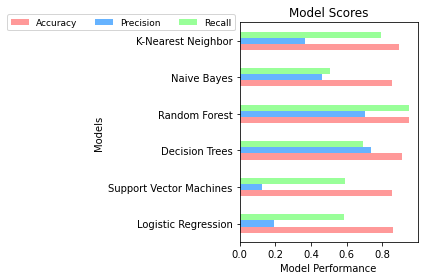

In [27]:
#Plotting the accuracy, precision and recall scores of the models for visual comparison
color = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = df_model.plot.barh(title = 'Model Scores', color = color)

ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='right',
    prop={'size': 9},
    

    
)
ax.set_xlabel('Model Performance', fontsize=10)
ax.set_ylabel('Models', fontsize='medium')
plt.tight_layout()

## Logistic Regression

In [28]:
#Print the classification report for a basic logistic regression model, the one also preformed above, for practice and ease of understanding workflow
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_ss, y_train)

y_pred = logreg.predict(X_test_ss)
print(classification_report(y_test, y_pred))
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#Dummy Classifier Confusion matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       709
           1       0.59      0.19      0.29       125

    accuracy                           0.86       834
   macro avg       0.73      0.58      0.61       834
weighted avg       0.83      0.86      0.83       834

Accuracy Score : 0.8585131894484412
Precision Score : 0.5853658536585366
Recall Score : 0.192
F1 Score : 0.2891566265060241
Confusion Matrix : 
[[692  17]
 [101  24]]


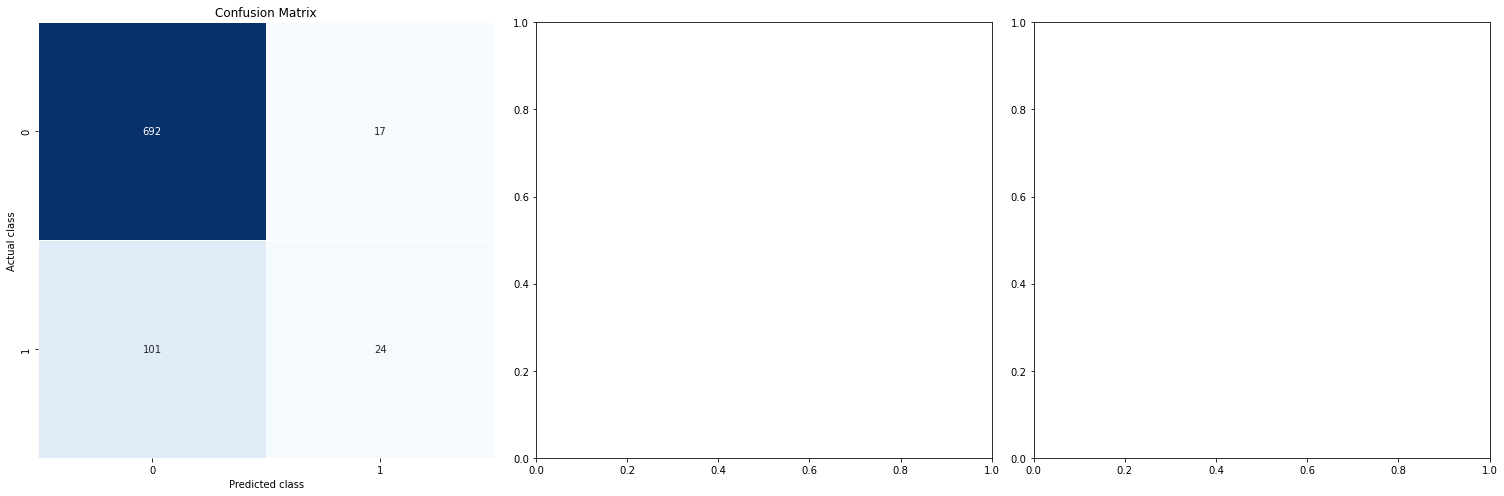

In [29]:
#create confusion matrix heatmap of the baseline logistic regression model
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(21, 7))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues", ax = ax1)
ax1.set_title("Confusion Matrix")
ax1.set_xlabel("Predicted class")
ax1.set_ylabel("Actual class")
fig.tight_layout()


plt.show()



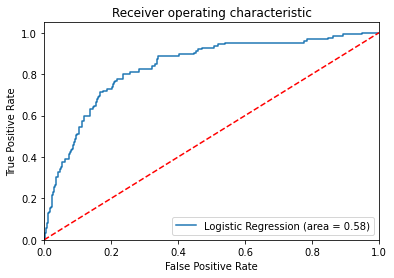

In [30]:
# ROC is a coomon tool for binary classifiers and we would want the the dotted line that represents the ROC curve of a purely random classifier to stay as far away from that line as possible. 
#This model has 85% accuracy which is high and there is a definite curve away from the line shown below.  

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test_ss))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_ss)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [31]:
#hypertune the model using GridSearch to find the most optimal hypertuning parameters
param_grid_lr = ({"max_iter": [20, 50, 100, 200, 500, 1000],
                  "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                  "class_weight": ["balanced"],
                  "penalty" : ['none', 'l1', 'l2', 'elasticnet'],
                  'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]})


logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234),scoring ="accuracy", param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)
logModel_grid.fit(X_train_ss, y_train)
print(logModel_grid.best_estimator_)
y_pred_lr = logModel_grid.predict(X_test_ss)
      

Fitting 10 folds for each of 960 candidates, totalling 9600 fits
LogisticRegression(C=0.0001, class_weight='balanced', max_iter=20, penalty='l1',
                   random_state=1234, solver='liblinear')


The parameters chosen are class weight = balanced, which uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)), max iterations = 20 which is how many iterations for the solvers to converge, random state = 1234 for shuffling the data, and solver = newton-cg which is best for multiclass problems.

In [32]:
# fitting the best parameters to new logistic regression model 
lg_model =LogisticRegression(C=0.0001, class_weight='balanced', max_iter=20, penalty='l1', random_state=1234,
                   solver='liblinear')
lg_model.fit(X_train_ss, y_train)

LogisticRegression(C=0.0001, class_weight='balanced', max_iter=20, penalty='l1',
                   random_state=1234, solver='liblinear')

In [33]:
# using this newly fitted trained data to predict data and print accuracy of train and test data
y_hat_lg = lg_model.predict(X_train_ss)
y_lg_model = lg_model.predict(X_test)
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat_lg))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_lg_model))

Training set accuracy:  0.8567426970788315
Test set accuracy:  0.8501199040767387


The training set accuracy is 85% with the test set accuracy at 85%. Although this was not an improvement over the baseline model which also had an accuracy of 85%, the test set accuracy is high. 

[[709   0]
 [125   0]]


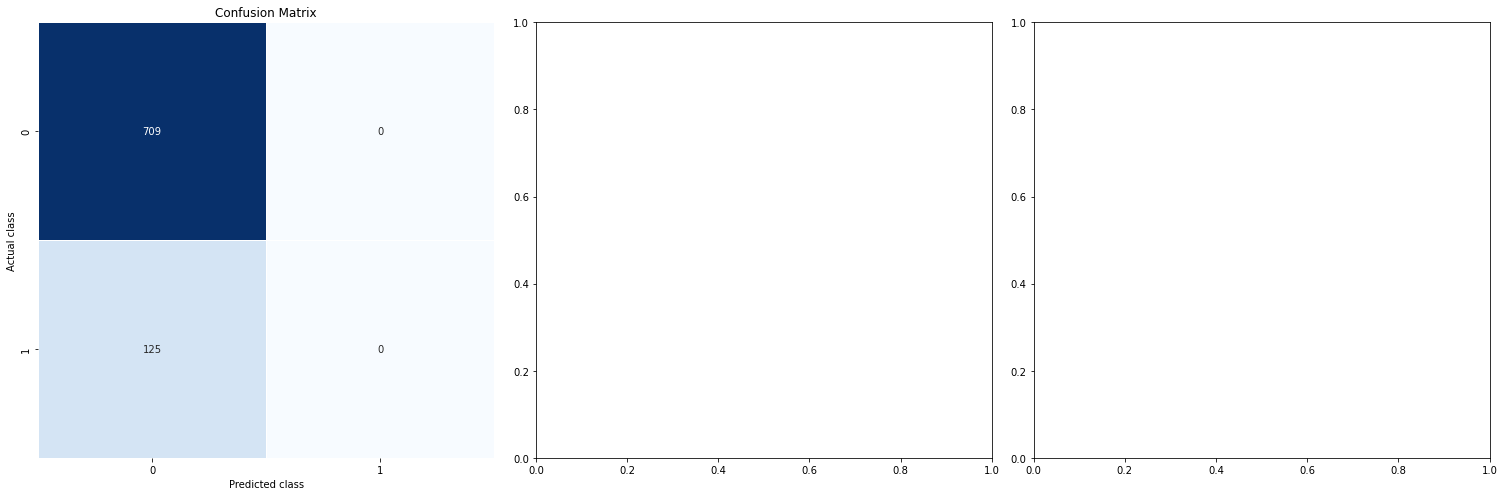

In [34]:
#print and create confusion matrix heatmap with newly hypertuned model
print(confusion_matrix(y_test, y_lg_model))
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(21, 7))
cm = confusion_matrix(y_test, y_lg_model)
sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues", ax = ax1)
ax1.set_title("Confusion Matrix")
ax1.set_xlabel("Predicted class")
ax1.set_ylabel("Actual class")
fig.tight_layout()


plt.show()

In [35]:
#printing the classification report of the logistic Regression hypertuned model
print(classification_report(y_test, y_lg_model))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       709
           1       0.00      0.00      0.00       125

    accuracy                           0.85       834
   macro avg       0.43      0.50      0.46       834
weighted avg       0.72      0.85      0.78       834



In [36]:
#cross validate scores
scores_lg = cross_val_score(logreg, X, y, cv =5)

In [37]:
#Print the model accuracy of the cross validated scores
print('Model accuracy: ',np.mean(scores_lg))

Model accuracy:  0.8505859682771227


In [38]:
# Printing the accuracy of logistic Regression hypertuned model
print(accuracy_score(y_test, y_pred_lr), ": is the accuracy score")

0.8501199040767387 : is the accuracy score


The accuracy score of the logistic regression hypertuned model did not improve upon the baseline model. Both had 85%.

## K Nearest Neighbors

In [39]:
#Next evaluation metric ic K-Nearest Neighbors

knn = KNeighborsClassifier()
#Training the model.
knn.fit(X_train_ss, y_train)

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train_ss, y_train)
#Print The value of best Hyperparameters   
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 5


In [40]:
#hypertune the model using GridSearch to find the most optimal hypertuning parameters

knn = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
grid_search = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result_knn = grid_search.fit(X_train_ss, y_train)
# summarize results
print("Best: %f using %s" % (grid_result_knn.best_score_, grid_result_knn.best_params_))


Best: 0.892758 using {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}


The best parameters are manhattan for the metric because , 5 n-neighbors is the default and was also chosen as best in the first KNN gridsearch , and uniform for weights because all the points should be weighed equally for this data. 

In [41]:
# fitting the best parameters found from the gridsearch to new knn model 
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',metric = 'manhattan')
knn.fit(X_train_ss, y_train)

KNeighborsClassifier(metric='manhattan')

In [42]:
#Accuracy of the training set with the knn evaluator
y_hat = knn.predict(X_train_ss)
y_knn = knn.predict(X_test)
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  0.9211684673869548
Test set accuracy:  0.39568345323741005


Although the KNN training set accuracty is higher than the logistic regression hypertuned model, the test set accuracy is much lower, which may mean that this may be an overfit model.

[[224 485]
 [ 19 106]]


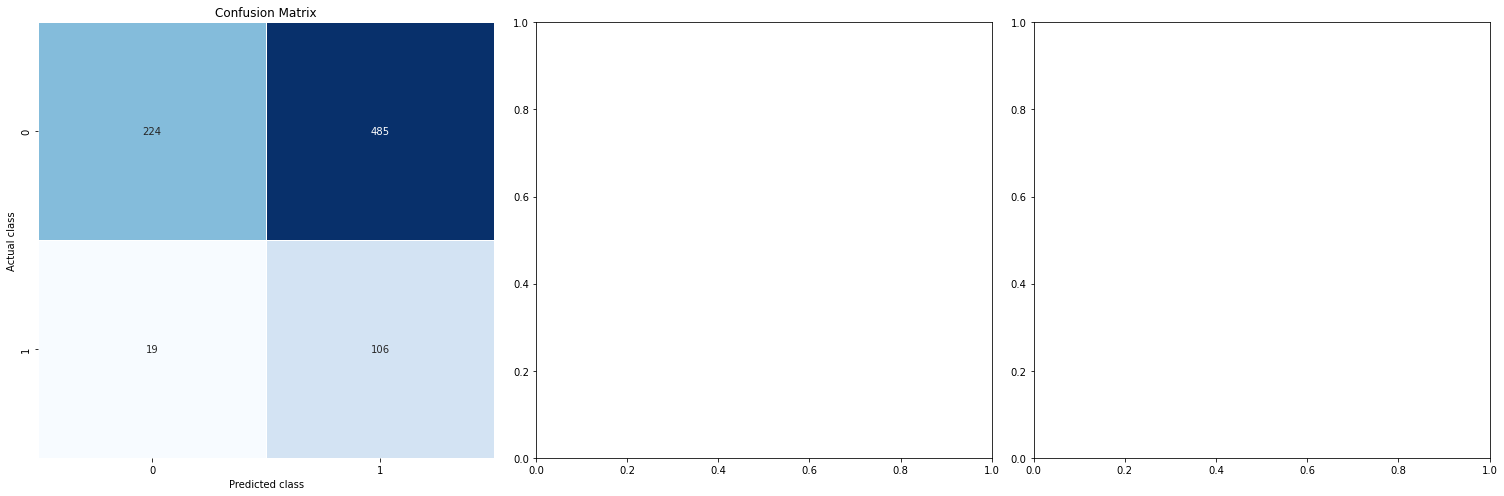

In [43]:
#printing and creating the confusion matrix of improved knn model
3
print(confusion_matrix(y_test, y_knn))
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(21, 7))
cm = confusion_matrix(y_test, y_knn)
sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues", ax = ax1)
ax1.set_title("Confusion Matrix")
ax1.set_xlabel("Predicted class")
ax1.set_ylabel("Actual class")
fig.tight_layout()


plt.show()

In [44]:
#classification report of the improved knn model
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.92      0.32      0.47       709
           1       0.18      0.85      0.30       125

    accuracy                           0.40       834
   macro avg       0.55      0.58      0.38       834
weighted avg       0.81      0.40      0.44       834



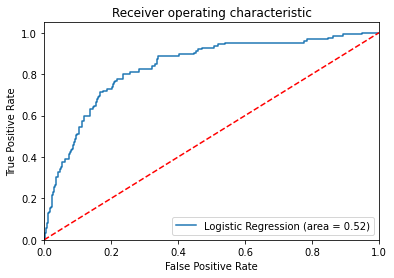

In [45]:
# Testing ROC on this model
logit_roc_auc = roc_auc_score(y_knn, logreg.predict(X_test_ss))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_ss)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [46]:
#cross validate scores
scores = cross_val_score(knn, X, y, cv =5)
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.8817919868894382


In [47]:
#Scaling the predictive variables
preds_knn = knn.predict(X_test_ss)
probs_knn = knn.predict_proba(X_test_ss)

In [48]:
#Printing out the scores of log loss, accuracy, precision, and recall. 
print("log loss: ", log_loss(y_test, probs_knn))
print("accuracy: ", accuracy_score(y_test, preds_knn))
print("precision:", precision_score(y_test, preds_knn))
print("recall:   ", recall_score(y_test, preds_knn))

log loss:  1.0035985340534541
accuracy:  0.894484412470024
precision: 0.8936170212765957
recall:    0.336


This knn model has 89% accuracy, which unforunately is the same as the baseline K-Nearest Model. Hypertuning the model did not have a strong effect. 

## Random Forests

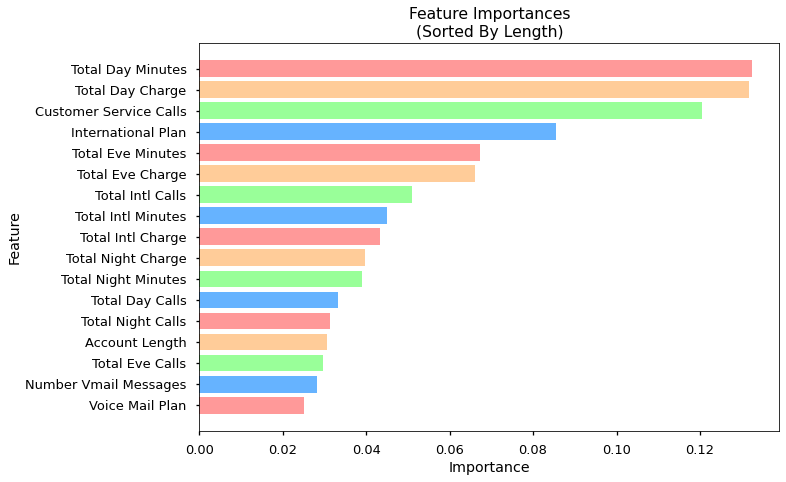

In [49]:
#plotting feature importance using random forests classifier
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
feature_importance_df = pd.DataFrame(
    forest.feature_importances_, 
    columns=['importance']
    )

# Add feature names.
feature_importance_df['feature'] = X.columns

# For vanity...
feature_importance_df['feature'] = (
    feature_importance_df['feature']
    .apply(str.title)
    )

# Sort the data!
feature_importance_df.sort_values('importance', inplace=True)
feature_importance_df

# Plot feature importances.
with plt.style.context(['seaborn-talk']):
    fig, ax = plt.subplots()
    ax.barh(
        y=feature_importance_df['feature'],
        width=feature_importance_df['importance'],
        color = ['#ff9999','#66b3ff','#99ff99','#ffcc99'],
        )
    ax.set(
        title='Feature Importances\n(Sorted By Length)',
        xlabel='Importance',
        ylabel='Feature'
        )

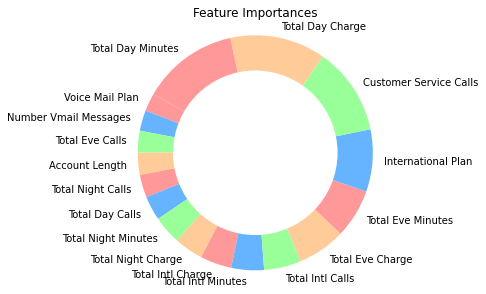

In [50]:
#Creating a pie chart figure of the random forest importancess 
labels = feature_importance_df['feature']
sizes = feature_importance_df['importance']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()


plt.pie(sizes, colors = colors, labels=labels, startangle=150, pctdistance=0.100)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
plt.tight_layout()
plt.title('Feature Importances')
plt.show()

In [51]:
#gridsearch for best parameters in random forest
rf = RandomForestClassifier()   
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
max_features = ['auto', 'sqrt']
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
min_samples_split = [2, 5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
grid_result_rf = rf_random.fit(X_train_ss, y_train)
# summarize results
print("Best: %f using %s" % (grid_result_rf.best_score_, grid_result_rf.best_params_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best: 0.955582 using {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False}


The best parameters chosen for this Random Forest model are 1000 n_estimators, which is how many trees are in this forest, 5 min_samples_split, which is the minimum number of samples required to split an internal node, 2 min_samples_leaf, which can have a smoothing effect on the model, a sqrt max_features, which is the default to split features, 100 max depth, which  the number of nodes from the root down to the furthest leaf node, and False for bootstrap, which means that the entire dataset was used to build this random forest. 

In [53]:
# fitting the best parameters to new rf model 
rf = RandomForestClassifier(n_estimators= 1000, min_samples_split= 5, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 100, bootstrap= False)
rf.fit(X_train_ss, y_train)

RandomForestClassifier(bootstrap=False, max_depth=100, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=1000)

In [54]:
y_test_pred = grid_result_rf.predict(X_test_ss)
(y_test_pred == 0).sum()
print('Training set accuracy: ', metrics.accuracy_score(y_test, y_test_pred))

Training set accuracy:  0.9484412470023981


In [55]:
#Accuracy of the training set with the rf evaluator
y_hat_rf = rf.predict(X_train_ss)
y_rf = rf.predict(X_test)
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat_rf))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_rf))

Training set accuracy:  0.9995998399359743
Test set accuracy:  0.39448441247002397


Although the training set accuracy is 1 with rounding up from 99%, the test set accuracy is only 40% which could mean that this model is overfit.

In [56]:
#Scaling the predictive variables
preds_rf = rf.predict(X_test_ss)
probs_rf = rf.predict_proba(X_test_ss)

[[224 485]
 [ 20 105]]


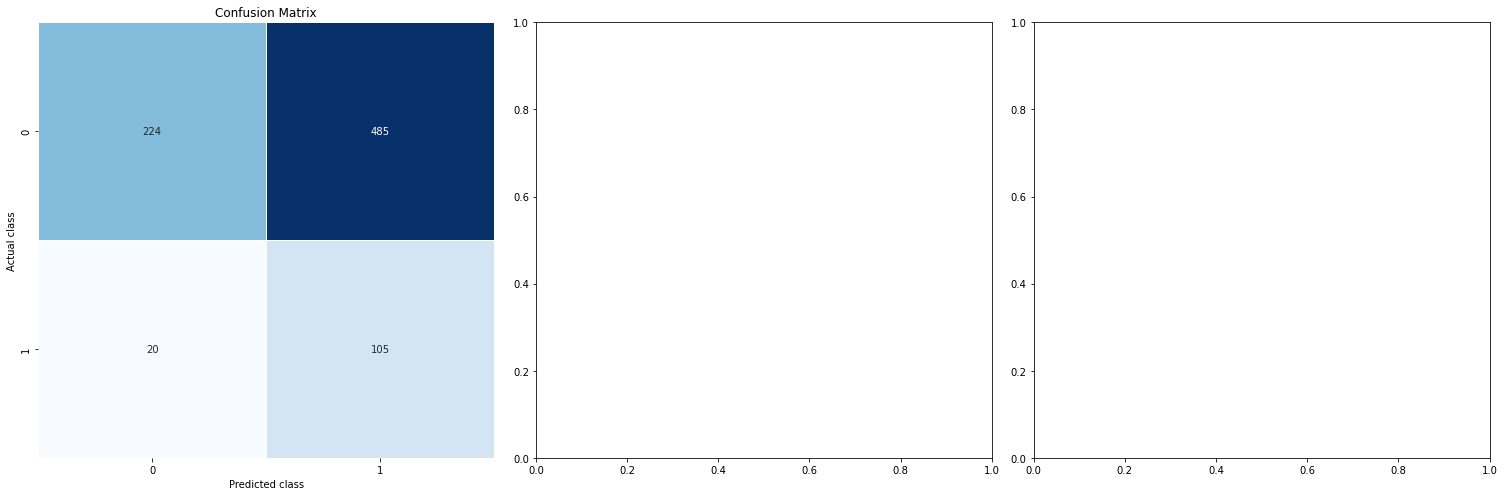

In [57]:
#creating the confusion matrix of improved rf model and confusion matrix heatmap

print(confusion_matrix(y_test, y_rf))
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(21, 7))
cm = confusion_matrix(y_test, y_rf)
sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues", ax = ax1)
ax1.set_title("Confusion Matrix")
ax1.set_xlabel("Predicted class")
ax1.set_ylabel("Actual class")
fig.tight_layout()


plt.show()

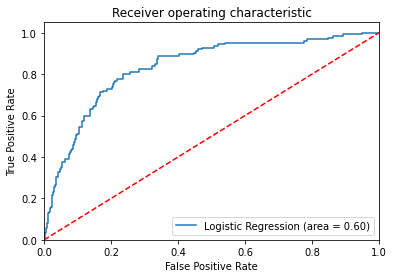

In [58]:
# Testing ROC on this model
logit_roc_auc = roc_auc_score(preds_rf, logreg.predict(X_test_ss))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_ss)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [59]:
#classification report of the improved rf model
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.92      0.32      0.47       709
           1       0.18      0.84      0.29       125

    accuracy                           0.39       834
   macro avg       0.55      0.58      0.38       834
weighted avg       0.81      0.39      0.44       834



In [60]:
#cross validate scores
scores_rf = cross_val_score(rf, X, y, cv =5)
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.8817919868894382


In [61]:
#Printing out the scores of log loss, accuracy, precision, and recall. 
print("log loss: ", log_loss(y_test, probs_rf))
print("accuracy: ", accuracy_score(y_test, preds_rf))
print("precision:", precision_score(y_test, preds_rf))
print("recall:   ", recall_score(y_test, preds_rf))

log loss:  0.17282087518155526
accuracy:  0.9460431654676259
precision: 0.925531914893617
recall:    0.696


In [63]:
print(confusion_matrix(y_test, preds_rf))

[[702   7]
 [ 38  87]]


The baseline Random Forest has an accuracy of 94% and the hypertuned model was able to slightly improve to a 95% accuracy. 

## Comparing the hypertuned models

In [64]:
#Comparing the hypertuned models
models_tuned = {}

# Logistic Regression
models_tuned['Logistic Regression'] =LogisticRegression(C=0.0001, class_weight='balanced', max_iter=20, penalty='l1', random_state=1234,
                   solver='liblinear')

# Random Forest
models_tuned['Random Forest'] = RandomForestClassifier(n_estimators= 1000, min_samples_split= 5, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 100, bootstrap= False)


# K-Nearest Neighbors
models_tuned['K-Nearest Neighbor'] = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',metric = 'manhattan')

In [65]:
#looking for accuracy, precision and recall scores within the hypertuned models
accuracy, precision, recall = {}, {}, {}

for keys in models_tuned.keys():
    
    # Fit the classifier
    models_tuned[keys].fit(X_train_ss, y_train)
    
    # Make predictions
    predictions = models_tuned[keys].predict(X_test_ss)
    
    # Calculate metrics
    accuracy[keys] = accuracy_score(predictions, y_test)
    precision[keys] = precision_score(predictions, y_test)
    recall[keys] = recall_score(predictions, y_test)
    

In [66]:
#create table and image of table comparing the accuracy between the hypertuned models
df_model_tuned = pd.DataFrame(index=models_tuned.keys(), columns=['Accuracy'])
df_model_tuned['Accuracy'] = accuracy.values()

columns=['Accuracy']


hypertuned_models = (tabulate(df_model_tuned, headers = columns, tablefmt="grid"))
print(hypertuned_models)

plt.savefig('hypertuned_models.png')
dfi.export(df_model_tuned, "hypertuned_models.png")

+---------------------+------------+
|                     |   Accuracy |
+=====================+============+
| Logistic Regression |   0.85012  |
+---------------------+------------+
| Random Forest       |   0.946043 |
+---------------------+------------+
| K-Nearest Neighbor  |   0.894484 |
+---------------------+------------+


<Figure size 432x288 with 0 Axes>

![](hypertuned_models.png)

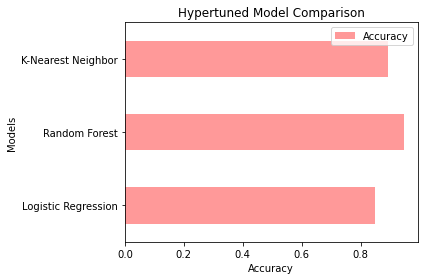

In [67]:
#Plotting the accuracy, precision and recall scores of the hypertuned models
ax = df_model_tuned.plot.barh(color = colors)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax.set_title('Hypertuned Model Comparison')
ax.set_xlabel('Accuracy')
ax.set_ylabel('Models')
ax.legend(
    ncol=len(models_tuned.keys()), 
    
)
plt.tight_layout()

## Creating New Data to Evaluate Best Model

In [68]:
#Creating a new dataset copied from the original data to manipulate the features and evaulate the hypertuned models
df.head()
print(df["total day minutes"].std())
df_new_1 = df.copy()
df_new_1["total day minutes"] = df_new_1["total day minutes"] - 54


54.46738920237142


In [69]:
#create training sets to start modeling and prediction upon the data
y = churn.astype(int)
X = df_new_1.drop(columns=['churn'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)
#Normalize the data to prevent leakage
ss = StandardScaler()
X_train_new = ss.fit_transform(X_train)

X_test_new = ss.transform(X_test)

In [70]:
#fitting random forest to the newly created data set
rf_new = rf_random.fit(X_train_new, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [71]:
#Evaluating the model through the training and test scores 
y_predict_new = rf_new.predict(X_train_new)
y_rf_new = rf_new.predict(X_test_new)
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_predict_new))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_rf_new))

Training set accuracy:  0.9995998399359743
Test set accuracy:  0.947242206235012


In [72]:
#creating a dataframe of the training and test accuracy scores
df_model_new = pd.DataFrame(index=[['Training set accuracy: ', metrics.accuracy_score(y_train, y_predict_new)], ['Test set accuracy: ', metrics.accuracy_score(y_test, y_rf_new)]], columns=['Accuracy'])

In [73]:
#printing the train and test scores for the random forest model on the new data
train_test_acc_1 = (tabulate([['Training set accuracy: ', metrics.accuracy_score(y_train, y_predict_new)], ['Test set accuracy: ', metrics.accuracy_score(y_test, y_rf_new)]], headers=['train/test', 'Accuracy']))
print(train_test_acc_1)

plt.savefig('train_test_acc_1.png')
dfi.export(df_model_new, "train_test_acc_1.png")

train/test                Accuracy
----------------------  ----------
Training set accuracy:    0.9996
Test set accuracy:        0.947242


<Figure size 432x288 with 0 Axes>

Both the training set accuracy and test set accuracy are high, over 95%, which means that the random forest model is applicable and improves when lessening total day minutes by standard deviation because it is a key feature in churn for this data.

In [75]:
#create 2nd training sets to start modeling and prediction upon the data while dropping total day charge due to possible collinearity
df_new_2 = df.copy()
df_new_2["total day minutes"] = df_new_2["total day minutes"] - 54

y = churn.astype(int)
X = df_new_2.drop(columns=['churn', 'total day charge'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)
#Normalize the data to prevent leakage
ss = StandardScaler()
X_train_new_2 = ss.fit_transform(X_train)

X_test_new_2 = ss.transform(X_test)

In [76]:
rf_new_2 = rf_random.fit(X_train_new_2, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [77]:
y_predict_new_2 = rf_new_2.predict(X_train_new_2)
y_rf_new_2 = rf_new_2.predict(X_test_new_2)
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_predict_new_2))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_rf_new_2))

Training set accuracy:  1.0
Test set accuracy:  0.9508393285371702


In [78]:
#printing the train and test scores for the random forest model on the new data
train_test_acc_2 = (tabulate([['Training set accuracy: ', metrics.accuracy_score(y_train, y_predict_new_2)], ['Test set accuracy: ', metrics.accuracy_score(y_test, y_rf_new_2)]], headers=['train/test', 'Accuracy']))
print(train_test_acc_2)

plt.savefig('train_test_acc_2.png')
dfi.export(df_model_tuned, "train_test_acc_2.png")

train/test                Accuracy
----------------------  ----------
Training set accuracy:    1
Test set accuracy:        0.950839


<Figure size 432x288 with 0 Axes>

# Final Results

When finding a model to predict the amount of churning of customers from SyriaTel, we found that Random Forest was performing the best in accuracy overall, the baseline and hypertuned models both were the highest for accuracy.

In order to use the best hyperparameters a gridsearch was used for the three baseline models with the highest accuracy. They were Logistic Regression, K-N-Neighbors, and Random Forest. 

We were not able to increase the performance of our models by too high of a percentage because the base models were already over 85% and for random forest 94%. However, the Random Forest hypertuned model did perform slightly higher with accuracy. 

Using this hypertuned Random Forest model as the best model, we copied new datasets from the original data and manipulated the features most strongly correlated to churn, total day minutes and total day charge. 

For the first manipuated copied data, we lessened total day minutes down from one standard deviation. It produced a training set accuracy of 0.9996 and a test set accuracy of 0.947242, greatly supporting this model and the importance of this feature in terms of churn. 

For the second manipuated copied data, we kept the one standard deviation lessened total day minutes, but we also dropped total day charge from the data set because of the potential for collinearity. It did slightly improve the training set to 1 and the test set to .951. 

In conclusion, the features of total day minutes and total day charge are correlated to the amount of churn from SyriaTel. I would advice SyriaTel to encourage their employees or provide training to lessen the total day minutes per call and also reevulate the total day charge. It is possible that hourly charge could reduce churn. 